In [3]:
import pandas as pd
import numpy as np

In [4]:

col_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
# load dataset
values = pd.read_csv("heart.csv", header=None)

In [5]:
X=values.loc[:,1:12]
Y=values.loc[:,1:1]

In [6]:
from sklearn import preprocessing

In [7]:
X=preprocessing.Normalizer().fit(X).transform(X)
X.shape
Y=np.ravel(Y,(303))

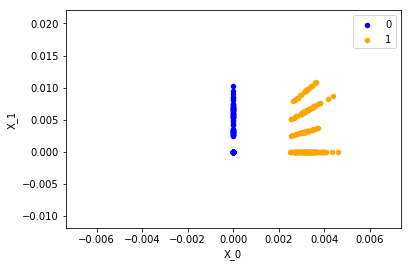

In [34]:
from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange',2:'black'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

## Logistic Model

In [9]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [10]:
def hx(w,X):
    z=np.array(w[0])
    for i in range(len(w)-1):
        z = z + w[i+1]*np.array(X[:,i])
    return sigmoid(z)

## Cost Function - Binary Cross Entropy

In [11]:
def cost(w, X, Y):
    y_pred = hx(w,X)
    return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))

## Gradient Descent

In [12]:
def grad(w, X, Y):
    y_pred = hx(w,X)
    g = [0]*13
    g[0] = -1 * sum(Y*(1-y_pred) - (1-Y)*y_pred)
    for j in range(10):
        g[j+1] = -1 * sum(Y*(1-y_pred)*X[:,j] - (1-Y)*y_pred*X[:,j])
    return g

In [29]:
def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost(w_prev, X, Y))
    wT=0
    for x in range(201):
        print('iteration=',x,'\n')
        w_prev = w_new
        wn = [0]*13
        for j in range(11):
            wn[j] = w_prev[j] - lr*grad(w_prev, X, Y)[j]
            w_new = wn
        print(w_new)
        print(cost(w_new, X, Y))
        
        for k in range(len(w)):
            wT=wT+(w_new[k]-w_prev[k])**2 
        
        if (wT <0.0000001):
            return w_new
        
        elif x>200: 
            return w_new
    return w_new
        

## Initializing Parameters

In [30]:
w=np.ones(12,np.dtype(np.int16))

## Training the Model

In [31]:
w = descent(w,w,.0099)
print(w)

[1 1 1 1 1 1 1 1 1 1 1 1]
275.71199722249924
iteration= 0 

[0.24314057278057077, 1.0004239247401974, 0.9975071882330688, 0.693555080839943, 0.41062977297269254, 0.9997447179579534, 0.99858354509311, 0.6509483056105222, 0.9995590512949204, 0.9981291797680683, 0.9967221184011118, 0, 0]
193.1060722048706
iteration= 1 

[0.002694491243408287, 1.001981998868244, 0.9965823216070655, 0.601700212996625, 0.21756333832705843, 0.9997282008563169, 0.9980445635846315, 0.5456325664485744, 0.9996605170066976, 0.99796943945508, 0.995725714844579, 0, 0]
188.24074254570485
iteration= 2 

[0.05110157060955721, 1.0041757666306337, 0.9965379109155257, 0.6300218309312408, 0.2459740607706035, 0.9998455011799074, 0.9979974955525966, 0.5768571311333667, 1.0000650361658958, 0.9987672308307796, 0.9960072230606906, 0, 0]
188.05383659031364
iteration= 3 

[0.036161820706537964, 1.006229625083742, 0.9962991141736732, 0.6319252176031241, 0.22590790236307579, 0.9999333436610217, 0.997842033333768, 0.5780410070678015

[0.029387898518527102, 1.066594875488079, 0.9903189044174165, 0.8469985460131253, -0.0024423150995144163, 1.00264861413456, 0.9939162911318188, 0.7866899484151325, 1.010738229945035, 1.0178243952121473, 0.9976714061261338, 0, 0]
187.50676315671046
iteration= 33 

[0.02904565186353513, 1.0686718298150693, 0.9901009968397584, 0.85380066759853, -0.009547406228873638, 1.0027412248759455, 0.9937761457184217, 0.7929615306677924, 1.0110968912912075, 1.0184610886667027, 0.9977208023173953, 0, 0]
187.49255586223526
iteration= 34 

[0.02870350649263623, 1.0707485138217152, 0.989882392229442, 0.8605674333391503, -0.016599922277720128, 1.00283377507667, 0.993635718995623, 0.7991796938143496, 1.0114556976082578, 1.0190977848957785, 0.9977697409771548, 0, 0]
187.4785389824507
iteration= 35 

[0.028361459489557938, 1.072824929379951, 0.9896630960433412, 0.8672990733765734, -0.02360025866180069, 1.0029262651012256, 0.9934950131793692, 0.805344859610177, 1.011814647521793, 1.0197344830339974, 0.9978182

[0.01575240029779371, 1.1494795281019328, 0.9811092068791093, 1.0936376569829598, -0.2492788545001206, 1.0063091986864858, 0.9881114137555447, 0.9997731801736557, 1.0251851569183097, 1.0432864082764506, 0.9993250702724785, 0, 0]
187.06297696277463
iteration= 73 

[0.015412368341811946, 1.1515470053740002, 0.9808672883165171, 1.099189909886265, -0.254561120207358, 1.0063996481600326, 0.9879615812559565, 1.0042071169289033, 1.0255486488353969, 1.0439226082946458, 0.9993588339761106, 0, 0]
187.05457878557104
iteration= 74 

[0.015072353861035134, 1.1536142775986389, 0.9806248612490336, 1.104714843656914, -0.2598044530763747, 1.006490049825625, 0.987811543539253, 1.0086022040803382, 1.0259122387291637, 1.0445587819324653, 0.9993922700438026, 0, 0]
187.0462868867807
iteration= 75 

[0.014732355455815825, 1.1556813461767597, 0.9803819296812822, 1.1102126311878626, -0.2650091425800972, 1.0065804039574344, 0.9876613022114145, 1.0129587510134246, 1.026275925613541, 1.0451949285931035, 0.9994253

[-0.0032929702268327493, 1.2649778310337063, 0.9668791407621817, 1.3668638608588677, -0.4923912143447123, 1.0113076865844919, 0.9794449307930364, 1.196004578176252, 1.0456670314088072, 1.078858444353297, 1.0007801628771036, 0, 0]
186.7212135105528
iteration= 129 

[-0.0036335787557819133, 1.2670357252384559, 0.9666141344287089, 1.371121352917589, -0.4958827463439991, 1.011395832380223, 0.979285758590111, 1.1986790268026364, 1.0460346964627925, 1.07949239629414, 1.0007992705629714, 0, 0]
186.71693652319695
iteration= 130 

[-0.0039742171598744986, 1.2690934789911972, 0.9663488020925595, 1.3753595349950019, -0.4993485404035756, 1.0114839431117015, 0.97912645393872, 1.2013287136067206, 1.0464024152496438, 1.0801262964034428, 1.0008181754384902, 0, 0]
186.7127073819177
iteration= 131 

[-0.0043148858646918425, 1.271151093221787, 0.9660831463445558, 1.379578523170463, -0.5027887840810528, 1.0115720189646986, 0.9789670178659886, 1.2039538383159645, 1.0467701871537662, 1.0807601443552122, 1.0

[-0.017628121154762817, 1.3512984174604836, 0.955495814761419, 1.5302991926992966, -0.6188770045084132, 1.0149816198442283, 0.9726565997030809, 1.2891402284999045, 1.0611487077989754, 1.1054364650041064, 1.0014268072462909, 0, 0]
186.57610231583223
iteration= 171 

[-0.01797025030264223, 1.3533511410163905, 0.9552191336737168, 1.5338369237267033, -0.6214337631412291, 1.0150684395184955, 0.9724926631289367, 1.290930084351317, 1.06151815478206, 1.1060680005504515, 1.001438764227135, 0, 0]
186.57335821725266
iteration= 172 

[-0.018312420086092997, 1.3554037578933233, 0.9549422198267833, 1.5373595854741973, -0.6239715474756483, 1.0151552309545235, 0.9723286309839759, 1.2927023581388968, 1.061887633666181, 1.1066994735801554, 1.0014505814894066, 0, 0]
186.57064089665928
iteration= 173 

[-0.018654630622640084, 1.357456268776701, 0.9546650750923478, 1.5408672646517463, -0.6264904936799225, 1.0152419942929516, 0.9721645040068184, 1.2944571937663727, 1.0622571440211677, 1.107330883905915, 1.0

## Visualizing the Result

In [49]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return (-w[0]-w[1]*x)/w[2]

from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()

TypeError: list indices must be integers or slices, not tuple